In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [35]:
Hist_data = pd.read_csv('/kaggle/input/hist-prices/HistoricalPrices (1).csv')
Hist_data.head()

,Date,Open,High,Low,Close
0,12/29/23,37701.63,37759.43,37538.80,37689.54
1,12/28/23,37661.52,37778.85,37650.98,37710.10
2,12/27/23,37518.62,37683.70,37488.60,37656.52
3,12/26/23,37405.90,37617.99,37371.83,37545.33
4,12/22/23,37349.27,37534.52,37268.88,37385.97


In [36]:
Hist_data = Hist_data.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})

In [37]:
Hist_data.head()

,Date,Open,High,Low,Close
0,12/29/23,37701.63,37759.43,37538.80,37689.54
1,12/28/23,37661.52,37778.85,37650.98,37710.10
2,12/27/23,37518.62,37683.70,37488.60,37656.52
3,12/26/23,37405.90,37617.99,37371.83,37545.33
4,12/22/23,37349.27,37534.52,37268.88,37385.97


In [38]:
Hist_data.describe()

,Open,High,Low,Close
count,250.000000,250.000000,250.000000,250.000000
mean,34106.536600,34271.172520,33946.441560,34121.536920
std,1155.265717,1146.598179,1196.495823,1177.233606
min,31759.870000,31906.470000,31429.820000,31819.140000
25%,33382.217500,33574.142500,33213.957500,33414.187500
50%,33895.150000,34048.075000,33730.620000,33935.570000
75%,34612.137500,34835.587500,34530.992500,34622.785000
max,37701.630000,37778.850000,37650.980000,37710.100000


In [39]:
Hist_data.shape

(250, 5)

In [60]:
Hist_data['Date'] = pd.to_datetime(Hist_data['Date'])
Hist_data = Hist_data.sort_values(by = 'Date')


**Drawing Line Plots**

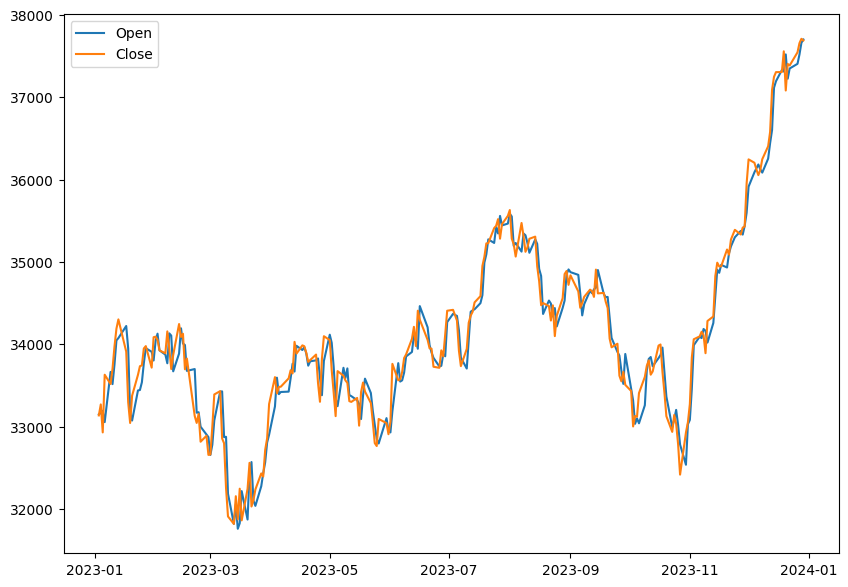

In [62]:
plt.figure(figsize=(10,7))
plt.plot(Hist_data['Date'], Hist_data['Open'], label = 'Open')
plt.plot(Hist_data['Date'], Hist_data['Close'], label = 'Close')
plt.legend()
plt.show()

In [46]:
area = px.area(data_frame = Hist_data ,
               y = "Close",
               x= "Date", 
               title = 'Daily Price')

area.update_xaxes(title_text = 'Date')
area.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
area.update_layout(showlegend = True,
    title = {
        'text': 'Daily Price',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        template="plotly_white")

area.show()

**Bar Plots**

In [63]:
# Import the calendar package 
from calendar import month_name

# Order by months by chronological order
Hist_data['Month'] = pd.Categorical(Hist_data['Date'].dt.month_name(), month_name[1:])

# Group metrics by monthly averages
# Group metrics by monthly averages
Hist_monthly_mean = Hist_data \
    .groupby('Month') \
    .mean() \
    .reset_index()

Hist_monthly_mean.head(6)

/tmp/ipykernel_33/1820702580.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Month,Date,Open,High,Low,Close
0,January,2023-01-16 15:36:00.000000000,33594.735000,33823.690000,33390.498500,33656.000500
1,February,2023-02-14 00:00:00.000000000,33696.416316,33844.902632,33438.562105,33648.256316
2,March,2023-03-16 08:20:52.173913088,32477.036957,32694.497826,32249.975217,32483.478261
3,April,2023-04-15 22:44:12.631578880,33674.288421,33832.691579,33549.615789,33731.280526
4,May,2023-05-15 01:05:27.272727296,33372.439091,33480.161364,33150.101364,33316.802273
5,June,2023-06-15 21:42:51.428571392,33828.082857,34001.955714,33727.557143,33904.976190


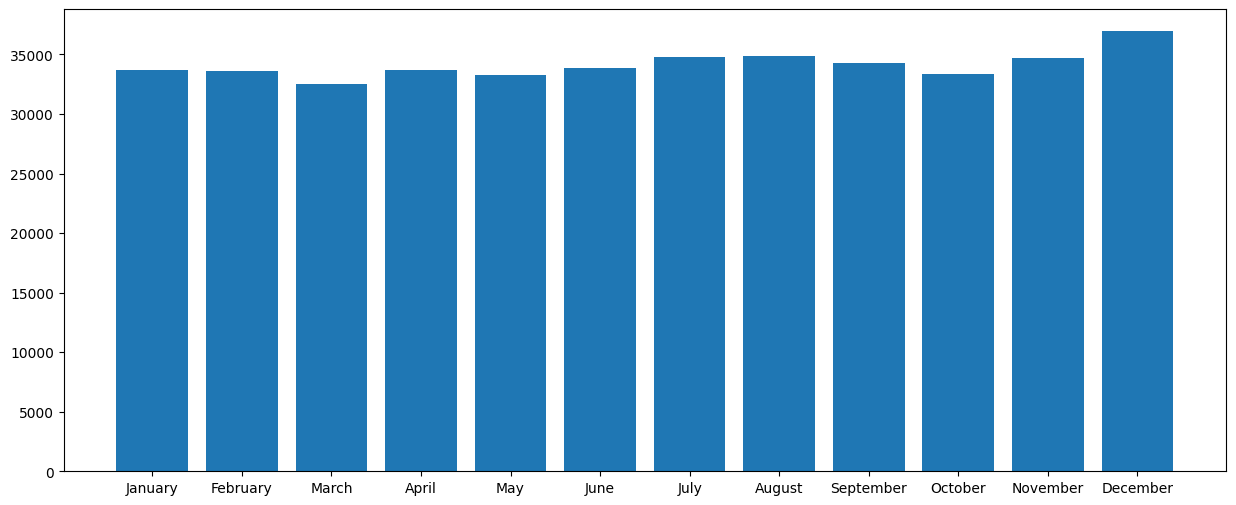

In [64]:
plt.figure(figsize=(15,6))
plt.bar(Hist_monthly_mean['Month'], height = Hist_monthly_mean['Close'])
plt.show()

**Sorting the bar graphs**

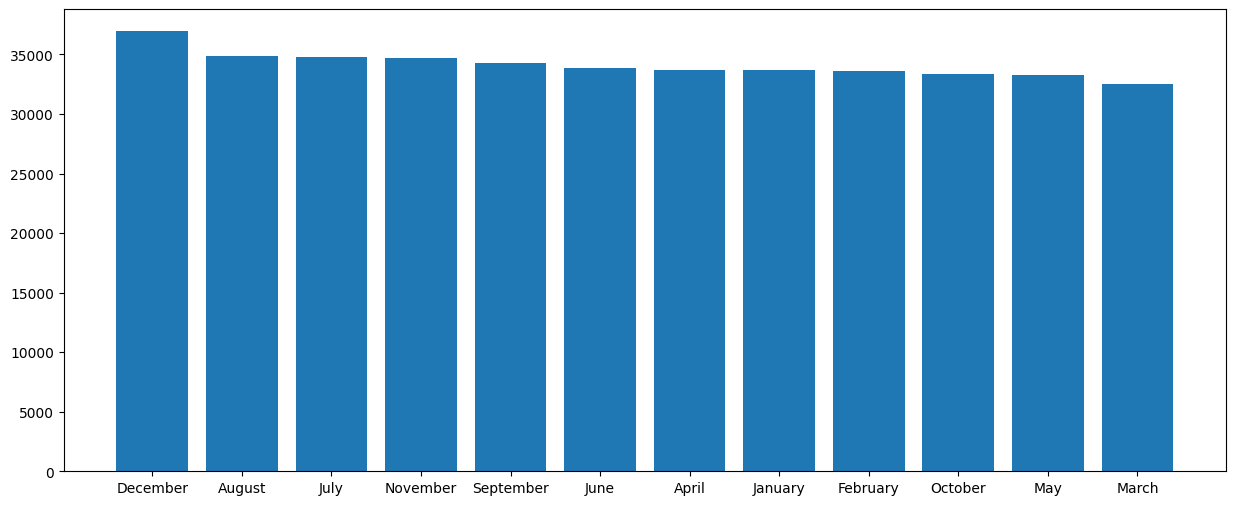

In [78]:
plt.figure(figsize=(15,6))
Hist_monthly_mean_srtd = Hist_monthly_mean.sort_values(by = 'Close', ascending = False)

plt.bar(Hist_monthly_mean_srtd['Month'], height = Hist_monthly_mean_srtd['Close'])
plt.show()

**Horizontal Bar Plot**

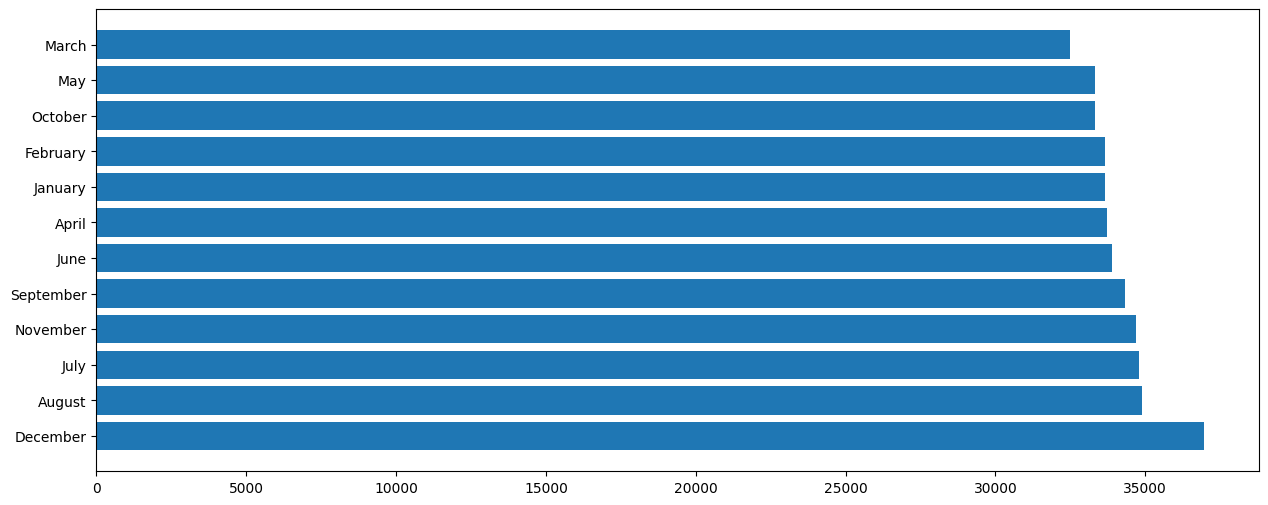

In [83]:
plt.figure(figsize=(15,6))
plt.barh(Hist_monthly_mean_srtd['Month'], Hist_monthly_mean_srtd['Close'])
plt.show()

**ScatterPlot**

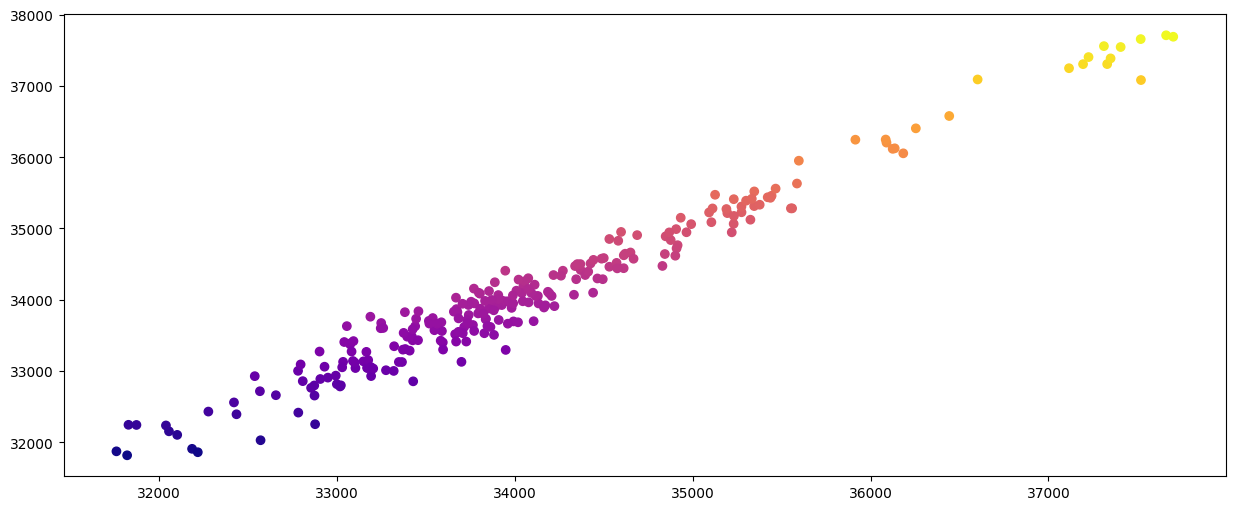

In [97]:
plt.figure(figsize=(15,6))
plt.scatter(Hist_data['Open'], Hist_data['Close'], c=Hist_data['Close'], cmap = plt.cm.plasma)
plt.show()

**ScatterPlot with a trend line**

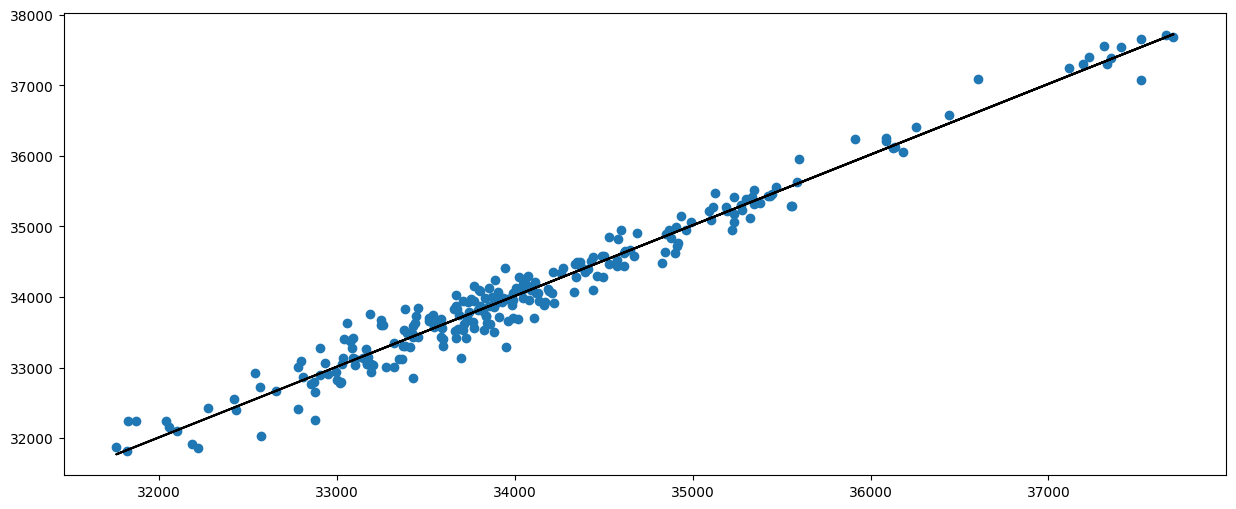

In [94]:
plt.figure(figsize=(15,6))
z = np.polyfit(Hist_data['Open'], Hist_data['Close'], 1)
p = np.poly1d(z)
plt.scatter(Hist_data['Open'], Hist_data['Close'])
plt.plot(Hist_data['Open'], p(Hist_data['Open']),color='black')
plt.show()

**Bars**

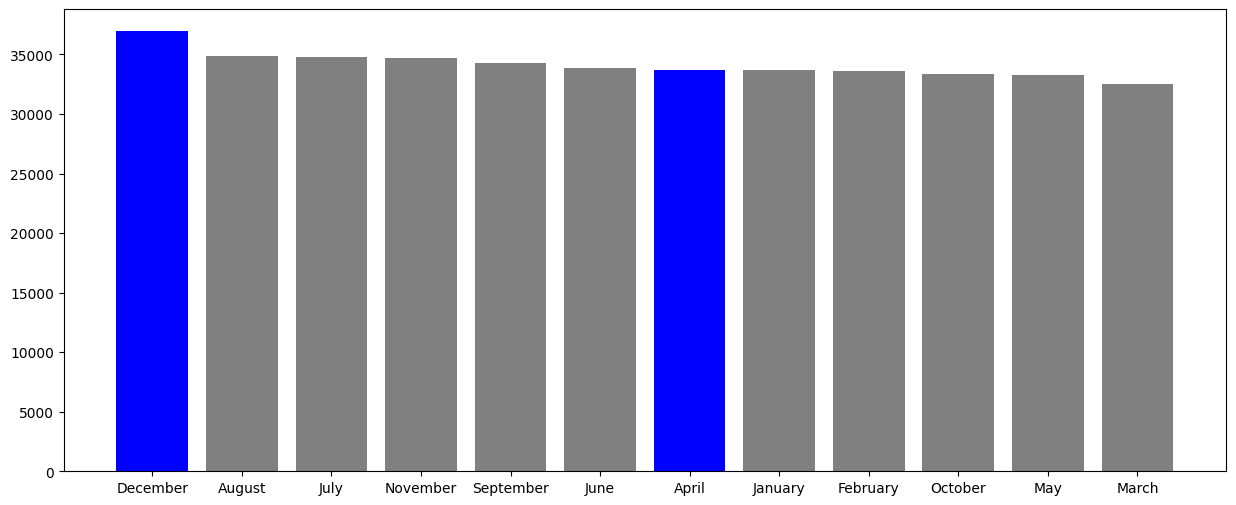

In [96]:
plt.figure(figsize=(15,6))
plt.bar(Hist_monthly_mean_srtd['Month'], height = Hist_monthly_mean_srtd['Close'], color = ['blue', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.show()